<a href="https://colab.research.google.com/github/Mittra19/Image_Restoration/blob/main/Image_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import view_as_windows as viewW
from sklearn import preprocessing
from sklearn.linear_model import OrthogonalMatchingPursuit as omp
from scipy import sparse as sps
import scipy

In [7]:
image = plt.imread("/content/drive/MyDrive/Colab Notebooks/kSVD/img01.png")
print(len(image.shape))

3


In [3]:
image2 = plt.imread("/content/drive/MyDrive/Colab Notebooks/kSVD/barbara.png")
image2.shape

(512, 512)

512
(512, 512, 1)


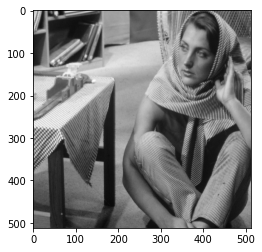

In [49]:
# Forming new image
bb = 8
overlap = 3
NN = int(np.ceil((image.shape[0]-bb)/overlap))*overlap+bb
MM = int(np.ceil((image.shape[1]-bb)/overlap))*overlap+bb
img_new = np.zeros((NN, MM, dims))
img_new[:h, :w, :] = image[:, :, :]
if dims == 3:
  print(img_new.shape)
  plt.imshow(img_new)
else:
  print(img_new.shape)
  plt.imshow(np.reshape(img_new, (img_new.shape[0], img_new.shape[1])), cmap = 'gray')

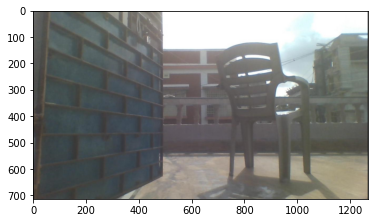

In [45]:
plt.imshow(img_new)

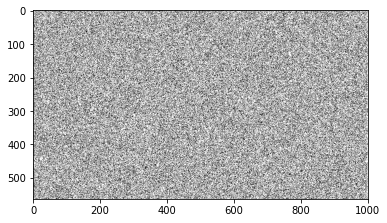

In [59]:
plt.imshow((image[:, :, 0] == 0), cmap = 'gray')

#Main Functions

In [20]:
def image_read(image_path):
  image = plt.imread(image_path)
  if len(image.shape) == 3:
    print("Image shape: "+str(image.shape))
    plt.imshow(image)
  else:
    plt.imshow(image, cmap='gray')
    image = image.reshape(image.shape[0], image.shape[1], 1)
    print("Image shape: "+str(image.shape))
  return image, image.shape[0], image.shape[1], image.shape[2]

In [50]:
def form_compatible_image(bb, overlap, image):
  NN = int(np.ceil((image.shape[0]-bb)/overlap))*overlap+bb
  MM = int(np.ceil((image.shape[1]-bb)/overlap))*overlap+bb
  img_new = np.zeros((NN, MM, dims))
  img_new[:h, :w, :] = image[:, :, :]
  if dims == 3:
    print(img_new.shape)
    plt.imshow(img_new)
  else:
    print(img_new.shape)
    plt.imshow(np.reshape(img_new, (img_new.shape[0], img_new.shape[1])), cmap = 'gray')
  return img_new

In [60]:
def get_mask(image):
  mask = (image[:, :, 0] == 0)
  plt.imshow(mask, cmap='gray')
  return mask

Image shape: (563, 1000, 3)


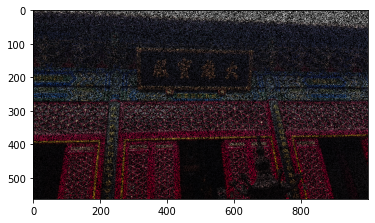

In [55]:
image, h, w, dims = image_read("/content/drive/MyDrive/Colab Notebooks/kSVD/Test_Fig2_Missing.png")

(563, 1001, 3)


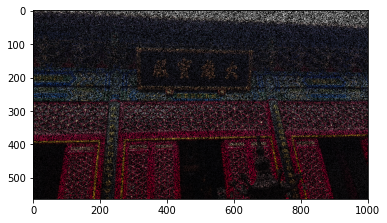

In [56]:
image = form_compatible_image(bb=8, overlap=3, image=image)

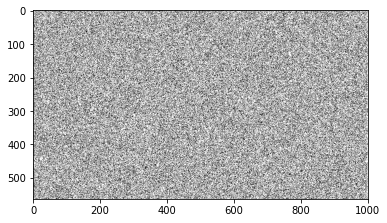

In [61]:
mask = get_mask(image)